In [1]:
# 라이브러리 불러오기
import os
import cv2
import matplotlib.pyplot as plt

import PIL
from pytesseract import image_to_string

import numpy as np
import time

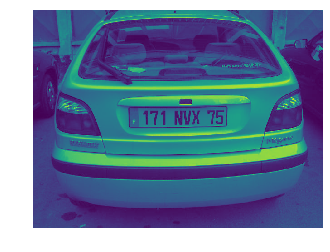

In [2]:
# image를 불러오기 전 한 파일 안에 모든 이미지 이동. 
# 알씨로 이미지 파일명을 'car_plate(숫자).jpg'로 일괄변경

# 차량 번호판 이미지 불러오기
img = cv2.imread('data/img/car_plate1.jpg')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
plt.axis("off")
plt.show()

(375, 500, 3)


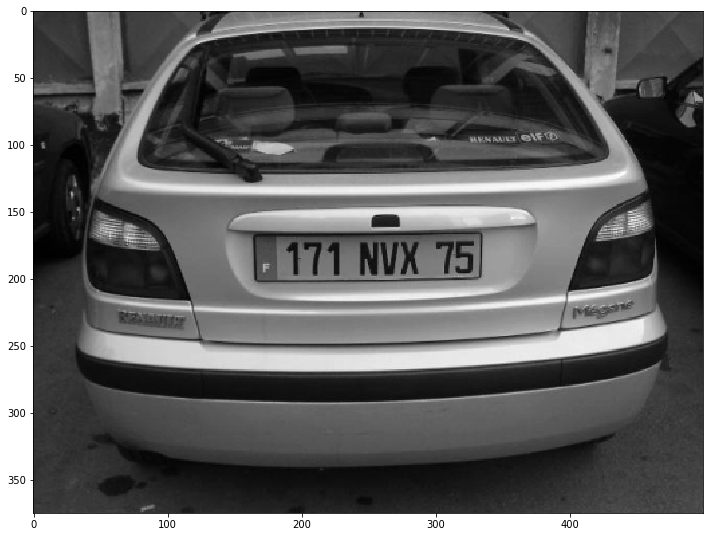

In [75]:
import imutils

# 원본 이미지 복사
img_file = 'data/img/car_plate1.jpg' # 경로 지정 필수!!
img = cv2.imread(img_file)

height, width, channel = img.shape

img = imutils.resize(img, width=500)
copy_img = img.copy()
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 그레이스케일

plt.figure(figsize=(12, 10))
plt.imshow(img2, cmap='gray')

print(img.shape)

In [76]:
img_thresh = cv2.adaptiveThreshold(img2,
                                  maxValue=255.0,
                                  adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  thresholdType=cv2.THRESH_BINARY_INV,
                                  blockSize=19,
                                  C=9)

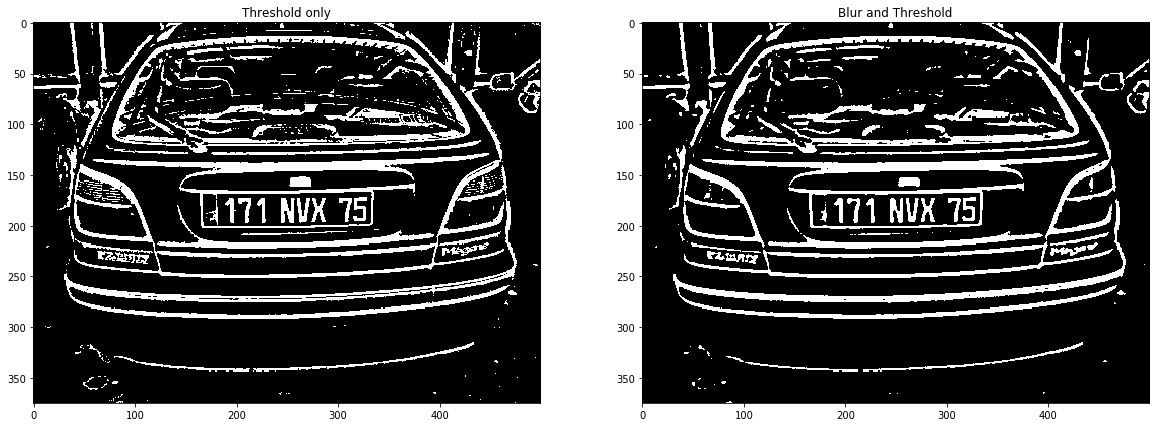

In [78]:
# 가우시안 필터 적용
img_blur = cv2.GaussianBlur(img2, (3, 3), 0)
img_th_blur = cv2.adaptiveThreshold(img_blur,
                                  maxValue=255.0,
                                  adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  thresholdType=cv2.THRESH_BINARY_INV,
                                  blockSize=19,
                                  C=9)

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title('Threshold only')
plt.imshow(img_thresh, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Blur and Threshold')
plt.imshow(img_th_blur, cmap='gray')

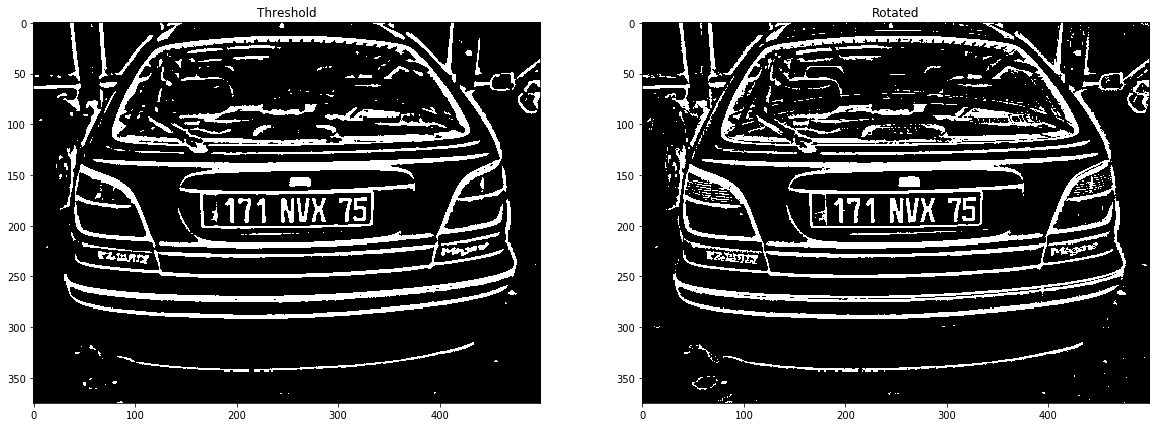

In [79]:
plate_cx, plate_cy = 250, 185
w, h = 500, 375
plate_w, plate_h = 175, 40
angle = 0 # 기울기 필요 없음

rotation_mtrx = cv2.getRotationMatrix2D(center=(plate_cx, plate_cy), 
                                        angle=angle, 
                                        scale=1.0)
img_rotated = cv2.warpAffine(img_thresh, M=rotation_mtrx, dsize=(w, h))

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title('Threshold')
plt.imshow(img_th_blur, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Rotated')
plt.imshow(img_rotated, cmap='gray')

In [80]:
img_cropped = cv2.getRectSubPix(img_rotated,
                               patchSize=(int(plate_w), int(plate_h)),
                               center=(int(plate_cx), int(plate_cy)))
cv2.imshow("Number", img_cropped)
cv2.waitKey()
cv2.destroyAllWindows()